# Customer Lifetime Value Analysis
What makes customers have a higher lifetime value? How can we increase customer lifetime value?

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
os.chdir('..')

In [3]:
# Raw Data
demo = pd.read_excel('data/Telco_customer_churn_demographics.xlsx')
location = pd.read_excel('data/Telco_customer_churn_location.xlsx')
services = pd.read_excel('data/Telco_customer_churn_services.xlsx')
status = pd.read_excel('data/Telco_customer_churn_status.xlsx')

In [4]:
# Combine on CustomerID
cltv_all = demo.merge(location, on='Customer ID')
cltv_all = cltv_all.merge(services, on='Customer ID')
cltv_all = cltv_all.merge(status[['Customer ID', 'CLTV']], on='Customer ID')
cltv_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count_x                            7043 non-null   int64  
 2   Gender                             7043 non-null   object 
 3   Age                                7043 non-null   int64  
 4   Under 30                           7043 non-null   object 
 5   Senior Citizen                     7043 non-null   object 
 6   Married                            7043 non-null   object 
 7   Dependents                         7043 non-null   object 
 8   Number of Dependents               7043 non-null   int64  
 9   Location ID                        7043 non-null   object 
 10  Count_y                            7043 non-null   int64  
 11  Country                            7043 non-null   objec

In [5]:
# Drop duplicated counts
cltv_all.drop(['Count', 'Count_x', 'Count_y'], axis=1, inplace=True)

# Drop all uniform columns
cltv_all.drop(['Country', 'State', 'Quarter'], axis=1, inplace=True)

# Drop columns that are redundant or unable to be converted to numerics
cltv_all.drop(['Location ID', 'Service ID', 'Customer ID', 'Lat Long', 'City'], axis=1, inplace=True)

In [6]:
# Convert No/Yes to 0/1
cltv_all['Under 30'] = cltv_all['Under 30'].map(dict(Yes=1, No=0))
cltv_all['Senior Citizen'] = cltv_all['Senior Citizen'].map(dict(Yes=1, No=0))
cltv_all['Married'] = cltv_all['Married'].map(dict(Yes=1, No=0))
cltv_all['Dependents'] = cltv_all['Dependents'].map(dict(Yes=1, No=0))
cltv_all['Referred a Friend'] = cltv_all['Referred a Friend'].map(dict(Yes=1, No=0))
cltv_all['Phone Service'] = cltv_all['Phone Service'].map(dict(Yes=1, No=0))
cltv_all['Multiple Lines'] = cltv_all['Multiple Lines'].map(dict(Yes=1, No=0))
cltv_all['Internet Service'] = cltv_all['Internet Service'].map(dict(Yes=1, No=0))
cltv_all['Online Security'] = cltv_all['Online Security'].map(dict(Yes=1, No=0))
cltv_all['Online Backup'] = cltv_all['Online Backup'].map(dict(Yes=1, No=0))
cltv_all['Device Protection Plan'] = cltv_all['Device Protection Plan'].map(dict(Yes=1, No=0))
cltv_all['Premium Tech Support'] = cltv_all['Premium Tech Support'].map(dict(Yes=1, No=0))
cltv_all['Streaming TV'] = cltv_all['Streaming TV'].map(dict(Yes=1, No=0))
cltv_all['Streaming Movies'] = cltv_all['Streaming Movies'].map(dict(Yes=1, No=0))
cltv_all['Streaming Music'] = cltv_all['Streaming Music'].map(dict(Yes=1, No=0))
cltv_all['Unlimited Data'] = cltv_all['Unlimited Data'].map(dict(Yes=1, No=0))
cltv_all['Paperless Billing'] = cltv_all['Paperless Billing'].map(dict(Yes=1, No=0))

# Convert Gender to a Binary
cltv_all['Gender'] = cltv_all['Gender'].map(dict(Female=1, Male=0))

# Map remaining categorical values to numerics
cltv_all['Offer'] = cltv_all['Offer'].map({'None':0, 'Offer A':1, 'Offer B':2, 'Offer C':3, 'Offer D':4, 'Offer E':5})
cltv_all['Internet Type'] = cltv_all['Internet Type'].map({'None':0, 'DSL':1, 'Cable':2, 'Fiber Optic':3})
cltv_all['Contract'] = cltv_all['Contract'].map({'Month-to-Month':0, 'One Year':1, 'Two Year':2})
cltv_all['Payment Method'] = cltv_all['Payment Method'].map({'Mailed Check':0, 'Credit Card':1, 'Bank Withdrawal':2})

In [7]:
X = cltv_all.drop(['CLTV'], axis=1)
y = cltv_all.CLTV

## Visualization

In [10]:
transformed = TSNE(n_components=2).fit_transform(X)

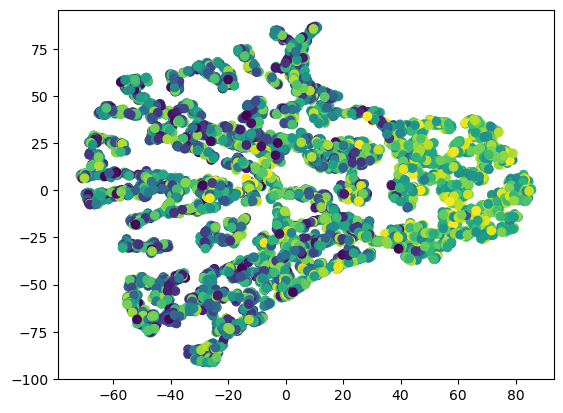

In [13]:
plt.figure()
plt.scatter(transformed[:,0], transformed[:,1], c=y)
plt.show()

## Modeling